In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import IsolationForest


def regression_report(y_true,y_pred):
    print('### CLASSIFICATION REPORT ###')
    print(f'MSE:\t{mean_squared_error(y_true,y_pred)}\nRMSE:\t{mean_squared_error(y_true,y_pred)**1/2}\nR2:\t{r2_score(y_true,y_pred)}')

In [117]:
df = pd.read_csv('../data/house_prices.csv',usecols=['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice'])
df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,856,856,1710,2,548,208500
1,1262,1262,1262,2,460,181500
2,920,920,1786,2,608,223500
3,756,961,1717,3,642,140000
4,1145,1145,2198,3,836,250000


In [118]:
df.isna().sum()

TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [119]:
x = df.drop('SalePrice',axis=1)
y = df.SalePrice

## Removendo outliers

In [120]:
isolation = IsolationForest(random_state=42)
out_mask = isolation.fit_predict(x,y)
out_mask

array([ 1,  1,  1, ..., -1,  1,  1])

In [121]:
out_mask = pd.Series(out_mask).replace(-1,False).replace(1,True)
out_mask

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456    False
1457    False
1458     True
1459     True
Length: 1460, dtype: bool

In [122]:
x_no_out = x[out_mask]
y_no_out = y[out_mask]

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x_no_out,y_no_out,test_size=0.2,random_state=42)

## Regressão Linear Simples

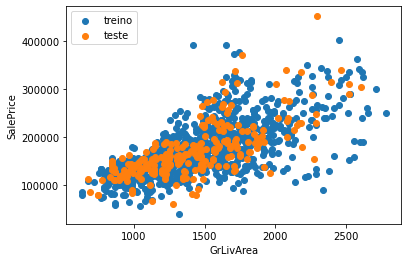

In [124]:
f, ax = plt.subplots()

ax.scatter(x_train.GrLivArea,y_train,color='tab:blue',label='treino')
ax.scatter(x_test.GrLivArea,y_test,color='tab:orange',label='teste')

ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')

plt.legend()
plt.show()

In [125]:
lr = LinearRegression()
lr.fit(x_train.GrLivArea.values.reshape(-1,1),y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(x_test.GrLivArea.values.reshape(-1,1))

In [127]:
lr.coef_[0],lr.intercept_

(92.12264801915326, 39335.05590902077)

In [128]:
regression_report(y_test,y_pred)

### CLASSIFICATION REPORT ###
MSE:	1790439447.99515
RMSE:	895219723.997575
R2:	0.4867636537558634


## Regressão Linear Múltipla

In [129]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [130]:
lr.coef_,lr.intercept_

(array([   80.41099489,   -31.38999446,    67.8076552 , 21755.97194078,
           33.22614476]),
 -28894.413559899316)

In [131]:
regression_report(y_test,y_pred)

### CLASSIFICATION REPORT ###
MSE:	942598641.9583932
RMSE:	471299320.9791966
R2:	0.7298004780250343
